# Lab 1 - k-Nearest Neighbors
### Clasificación k-NN

In [1]:
%matplotlib inline
from preamble import *
#Para importar una serie de configuraciones previas en preamble.py

Usemos para empezar nuestro dataset *Forge*. Primero, separamos los datos en un set de training y de test para poder evaluar el rendimiento del modelo:

In [2]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Lo siguiente es importar e instanciar la clase. Aquí es donde podemos poner un número de vecinos, por ejemplo, 3:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Finalmente, entrenamos el modelo usando el juego de datos de entrenamiento. Esto implica almacenar el dataset para poder calcular los vecinos durante la predicción:

In [4]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [5]:
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))

Predicciones sobre el juego de pruebas: [1 0 1 0 1 0 0]


In [6]:
print("Precisión sobre el juego de pruebas: {:.2f}"
      .format(clf.score(X_test, y_test)))

Precisión sobre el juego de pruebas: 0.86


### Análisis de KNeighborsClassifier

Se puede ilustrar la predicción para todos los puntos en el plano $xy$. Se usan colores en el plano de acuero con la clase predicha para el punto en cuestión. Eso permite ver la frontera de decisión y desarrollar una cierta intuición sobre el modelo en función del número de vecinos.

En el siguiente código, se generan gráficas para valores de vecinos de 1, 3 y 9:

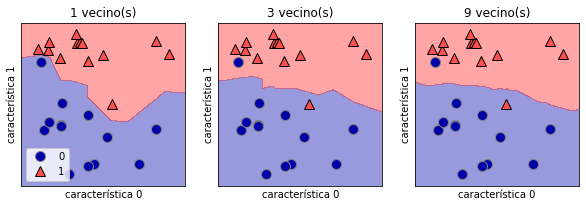

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

**Pregunta**: ¿qué diferencias observas en la frontera de clasificación y qué puede decirse del uso de varios vecinos frente al uso de uno sólo?


Un sólo vecino hace que la frontera de decisión se ajuste mucho a los datos de entrenamiento. Si se incrementa el número de vecinos, la frontera se suaviza.
Esto implica que con un número bajo de vecinos, el modelo es más complejo, y con un número alto, menos. Yendo a un extremo, si $k=n$, donde n es el núermo de muestras del juego de entrenamiento, todos los puntos tendrían el mismo número de vecions y la predicción sería siempre la mism: la clase más frecuente en el juego de entrenamiento.


Vamos a evaluar ahora la conexión entre complejidad y generalización usando un dataset real (Breast Cancer Dataset):

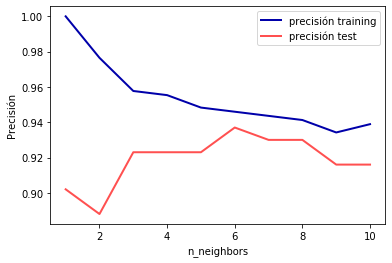

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train, y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,
         training_accuracy, label="precisión training")
plt.plot(neighbors_settings, test_accuracy, label="precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()

¿Reconoces las características de las curvas  de complejidad frente a precisión que vimos al principio? (Nótese que por el eje de ordenadas, la curva correspondiente al training set está invertida)

**¿Qué numero de vecinos es el mejor para obtener el mejor rendimiento del modelo?**

Como puede verse en la gráfica, obtenemos el mejor rendimiento en test para k=6, lo que nos da también la precisión que obtenemos en el dataset de training.

Finalmente, entrenamos el modelo usando el juego de datos de entrenamiento. Esto implica almacenar el dataset para poder calcular los vecinos durante la predicción:

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [18]:
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))

Predicciones sobre el juego de pruebas: [1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [19]:
print("Precisión sobre el juego de pruebas: {:.2f}"
      .format(clf.score(X_test, y_test)))

Precisión sobre el juego de pruebas: 0.92


### <font color='red'>Regresión k-NN</font> 
También hay una variante de regresión de k-Nearest Neighbors. De nuevo, comparemos el uso de un solo vecino frente a tres para ver la variación de las predicciones:

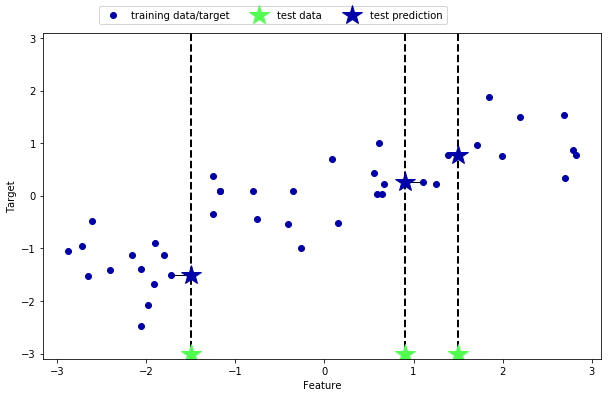

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

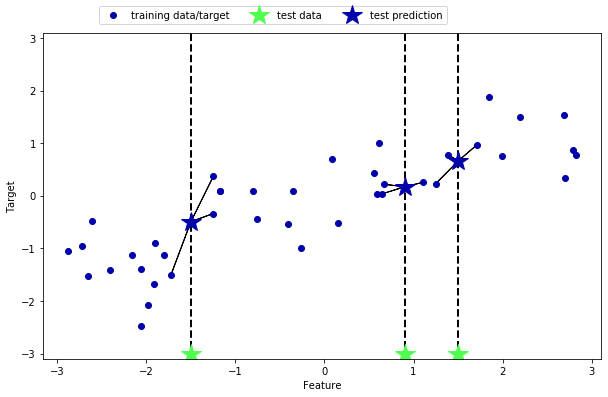

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

La implementación de kNN para regresión en Scikit-learn es muy parecida a su equivalente de clasificación. Lo hacemos aquí para el *Wave* dataset:

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Ajustamos el modelo usando los objetivo y datos de training
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [12]:
print("Predicciones sobre el test set:\n", reg.predict(X_test))

Predicciones sobre el test set:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


También podemos evaluar el modelo utilizando el método `score`, que para la regresión devuelve $R^2$ (el coeficiente de determinación, una medida de lo bueno que es un modelo de regresión que veremos en más detalle más adelante):

In [15]:
print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test, y_test)))

Coeficiente de determinación del test set: 0.65


### Análisis de KNeighborsRegressor

Para establecer el análisis, vamos a hacer una predicción de todos los posibles valores que puede tener la característica $x$ (donde $x\in[1,3000]$), y para ello creamos un dataset que tenga todos los puntos en una línea:

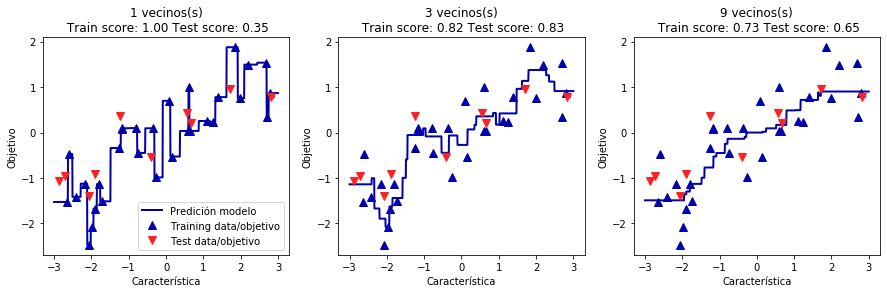

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Crear 1,000 data points, igualmente espaciados entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecinos(s)\n Train score: {:.2f} Test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
axes[0].legend(["Predición modelo", "Training data/objetivo",
                "Test data/objetivo"], loc="best")

Como ejercicio adicional con kNNs, ábrase el fichero [kNNs-Exercise.ipynb](kNNs-Exercise.ipynb).